# Experiment : 05
##  Digit classification using CNN architecture for MNIST dataset.

In [1]:
# ----------------------------- Import Libraries -----------------------------
import tensorflow as tf
import numpy as np
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# ----------------------------- Load and Explore Data -----------------------------

# Load the MNIST dataset (60,000 training and 10,000 test samples)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)


## Visualize Sample Digits

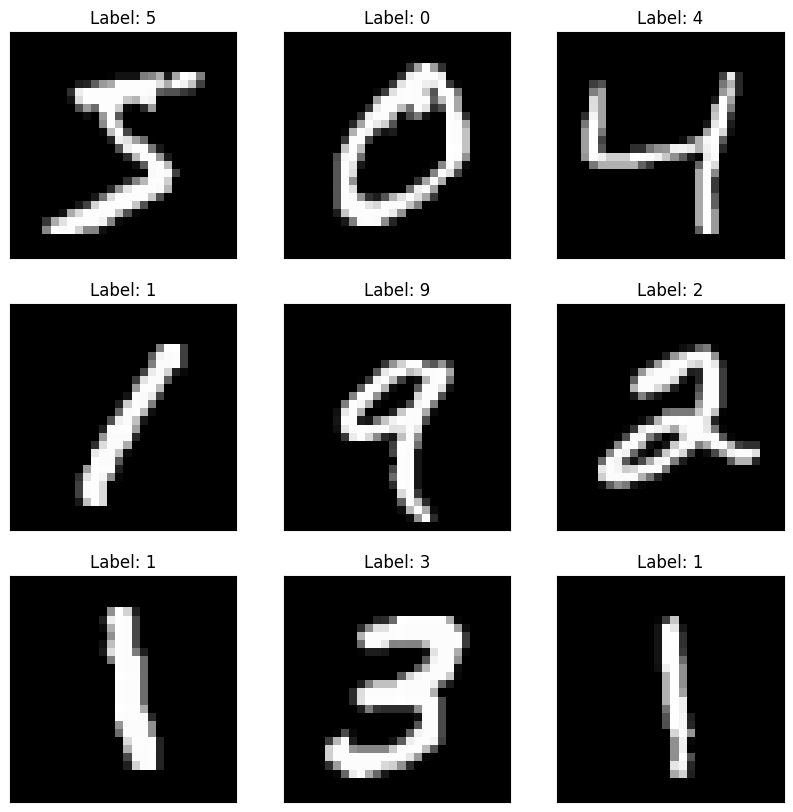

In [3]:
# ----------------------------- Visualize Sample Digits -----------------------------
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Display grayscale image
    plt.title(f"Label: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])

## Preprocessing

In [4]:
# ----------------------------- Preprocessing -----------------------------

# Reshape input data to fit the CNN input (28x28x1)
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# One-hot encode labels (10 classes: 0–9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Build CNN Model

In [5]:
# ----------------------------- Build CNN Model -----------------------------
model = models.Sequential([
    # First convolutional layer: 32 filters of 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Reduce spatial size by 2x

    # Second convolutional layer: 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and connect to dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

C:\Users\venki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [6]:
# ----------------------------- Compile the Model -----------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model architecture
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

None


## Train the Model

In [7]:
# ----------------------------- Train the Model -----------------------------
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)  # 20% data used for validation

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - accuracy: 0.8556 - loss: 0.4711 - val_accuracy: 0.9792 - val_loss: 0.0668
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9818 - loss: 0.0582 - val_accuracy: 0.9875 - val_loss: 0.0459
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9879 - val_loss: 0.0412
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9888 - val_loss: 0.0358
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9883 - val_loss: 0.0412
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9883 - val_loss: 0.0407
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9887 - val_loss: 0.0419
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9957 - loss: 0.0128 - 

## Evaluate on Test Set

In [8]:
# ----------------------------- Evaluate on Test Set -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9884 - loss: 0.0584
Test accuracy: 0.9910


## Plot Accuracy

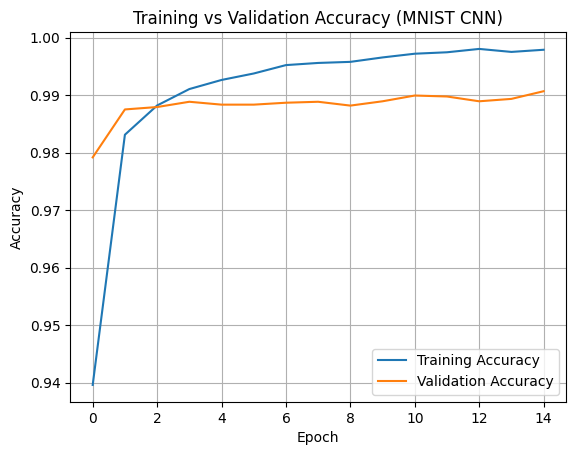

In [9]:
# ----------------------------- Plot Accuracy -----------------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (MNIST CNN)')
plt.legend()
plt.grid(True)
plt.show()